here the lzw algorithm is used to compress images.
the algorithm itself isn't lossy but we had to lose some data mapping the grayscale values to letters becuase python 3 has problems with asci code encoding.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

def print_pic(img):
    #gray image
    imgplot = plt.imshow(img)
    plt.show()


## LZW

In [3]:

def LZW_encode(uncompressed):
 
    # Build the dictionary.
    #only big letters 
    dict_size = 26
    dictionary = {chr(i+ord('A')): i for i in range(dict_size)}
 
    p = ""
    output = []
    for c in uncompressed:
        temp = p + c
        if temp in dictionary:
            p = temp
        else:
            output.append(dictionary[p])
            # Add temp to the dictionary.
            dictionary[temp] = dict_size
            dict_size += 1
            p = c
 
    # Output the code for w.
    if len(p):
        output.append(dictionary[p])
    return output
def LZW_decode(compressed):
    
    # Build the dictionary.
    dict_size = 26
    dictionary = {i: chr(i+ord('A')) for i in range(dict_size)}
    
 
    result = ""
    p=""
    bol = False     
    for k in compressed:
       
        if k in dictionary:
            entry = dictionary[k]
        elif k == dict_size:
            entry = p + p[0]
        
        result += (entry)
        
        # Add p+entry[0] to the dictionary unless it's first element
        if bol:
            dictionary[dict_size] = p + entry[0]
            dict_size += 1
 
        p = entry
        bol = True
    return result 



compressed = LZW_encode('TOBEORNOTTOBEORTOBEORNOT')
print (compressed)
decompressed = LZW_decode(compressed)
print (decompressed)

[19, 14, 1, 4, 14, 17, 13, 14, 19, 26, 28, 30, 35, 29, 31, 33]
TOBEORNOTTOBEORTOBEORNOT


# here we come to losing data

because the algorithm compresses string, we transform the grayscale values to  letters and after decompressing we reverse the operatio

In [4]:

def  inttochar(z):
    return chr((z//10)+65)


def chartoint (z):
    x = ((ord(z)-65)*10)
    return x


# MAIN:

image of 715654 pixels is compressed to string of 66121 chars.


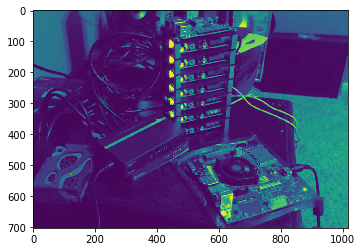

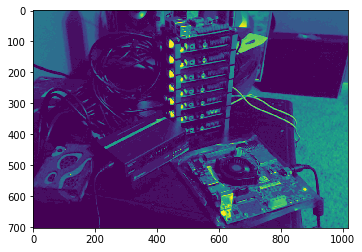

In [5]:
img = cv2.imread('try.jpg',0)
s = ""
h,w = img.shape

for x in range(h):
    for y in range(w):
        s += str(inttochar(img[x,y])) 

        
cipher = LZW_encode(s)
print ("image of {} pixels is compressed to string of {} chars.".format(h*w,len(cipher)))

plain = LZW_decode(cipher)


reconstruct = []

for c in plain:
    reconstruct.append(chartoint(c))
    
j = np.reshape(reconstruct,(h,w))
#print (j)
print_pic(img)  #ORIGINAL 
print_pic(j)    #RECOVERED from comp.